In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("houses_to_rent_v2.csv")

In [3]:
df.head()
#total(R$) is our target, in the currency Brazilian Real, BRL
#for quick reference, 1000 real is just under $200

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.info()
#no nulls, 13 features including total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [6]:
df["city"].value_counts()
#5 cities

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

In [7]:
5887 / 10692
#55% of records from Sao Paulo

0.5505985783763562

In [8]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


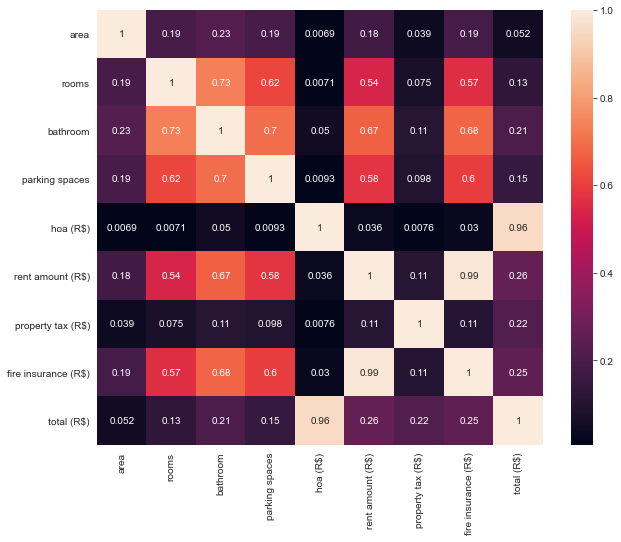

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
#total is highly correlated with hoa (homeowner's association tax)
#but hao does not seem to be well correlated with anything else

#fire insurance has an almost 1:1 correlation with rent amount
#must be calculated from rent, maybe a required law to do so

In [10]:
df.columns = ['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent amount',
       'property tax', 'fire insurance', 'total']
#renamed for easier analysis

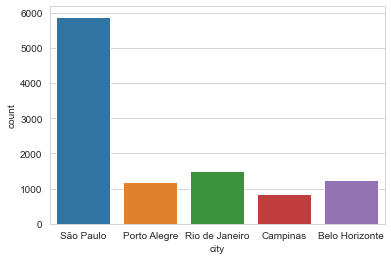

In [11]:
sns.countplot(df["city"])
#heavily concentrated in Sao Paulo

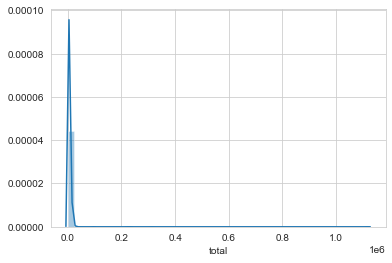

In [12]:
sns.distplot(df["total"])
#signficant outlier(s)

In [13]:
df[df["total"]>40000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
2182,São Paulo,700,4,7,8,-,acept,not furnished,0,45000,8750,677,54430
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000


In [14]:
df["total"].mean()
#mean is R5490, the above values of over R40,000 skew analysis 
#and neural network

5490.4869996258885

In [15]:
df.drop(df[df["total"]>40000].index, inplace=True)
#dropped the 7 outliers

### Without the 7 extreme entries

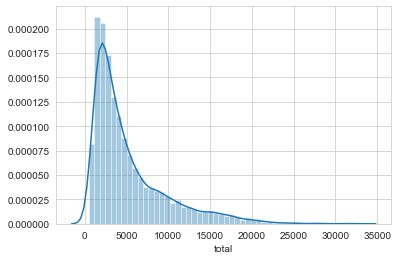

In [16]:
sns.distplot(df["total"])
#now a more healthy distribution

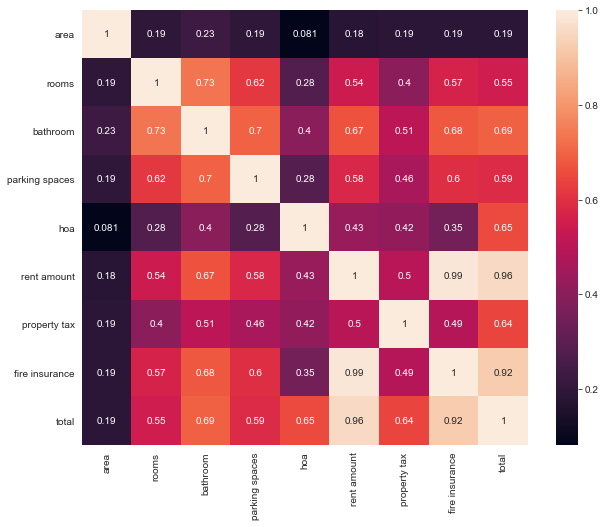

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
#significantly different results without the outliers

#homeowner's association tax is now much less correlated with price -
#clearly luxury house rents are drastically influenced by the hoa

#now, correlations are more evenly spread - with rent amount and fire
#insurance being very correlated with the total

In [18]:
df["floor"].value_counts()
# - needs to be a number, so can fill with 0 as the others are in order
#inserting 0 also seems to follow the trend;
#more locations at lower floor amounts

-      2460
1      1080
2       985
3       931
4       746
5       600
6       537
7       496
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
51        1
35        1
301       1
46        1
Name: floor, dtype: int64

In [19]:
df["floor"] = df["floor"].apply(lambda x: 0 if x == "-" else int(x))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10685 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10685 non-null  object
 1   area            10685 non-null  int64 
 2   rooms           10685 non-null  int64 
 3   bathroom        10685 non-null  int64 
 4   parking spaces  10685 non-null  int64 
 5   floor           10685 non-null  int64 
 6   animal          10685 non-null  object
 7   furniture       10685 non-null  object
 8   hoa             10685 non-null  int64 
 9   rent amount     10685 non-null  int64 
 10  property tax    10685 non-null  int64 
 11  fire insurance  10685 non-null  int64 
 12  total           10685 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


## Model (with rent)

### Formatting and split

In [21]:
#converting to int for processing
df["animal"] = df["animal"].apply(lambda x: 1 if x == "acept" else 0)

In [22]:
#converting to int for processing
df["furniture"] = df["furniture"].apply(lambda x: 1 if x == "furnished" else 0)

In [23]:
dummies = pd.get_dummies(df["city"], drop_first=True)

In [24]:
df = pd.concat([df, dummies], axis=1)

In [25]:
df.drop("city", inplace=True, axis=1)

df.info()

In [26]:
X = df.drop(["total", "rent amount", "fire insurance"], axis=1).values
y = df["total"].values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#20% test size since a lot of entries, over 10,000

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Base Sequential Model #1/3

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [32]:
df.shape

(10685, 16)

In [33]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor="val_loss", patience=4)

In [36]:
model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
          callbacks=[early_stop], epochs=400)

Epoch 1/400
268/268 [==============================] - 2s 8ms/step - loss: 47363732.0000 - val_loss: 44010228.0000
Epoch 2/400
268/268 [==============================] - 2s 6ms/step - loss: 41286864.0000 - val_loss: 29001922.0000
Epoch 3/400
268/268 [==============================] - 1s 5ms/step - loss: 23576068.0000 - val_loss: 14948974.0000
Epoch 4/400
268/268 [==============================] - 1s 5ms/step - loss: 18966972.0000 - val_loss: 13519822.0000
Epoch 5/400
268/268 [==============================] - 1s 5ms/step - loss: 18379440.0000 - val_loss: 12850046.0000
Epoch 6/400
268/268 [==============================] - 1s 5ms/step - loss: 17170734.0000 - val_loss: 11979115.0000
Epoch 7/400
268/268 [==============================] - 1s 5ms/step - loss: 16656295.0000 - val_loss: 11289599.0000
Epoch 8/400
268/268 [==============================] - 1s 5ms/step - loss: 15848293.0000 - val_loss: 10663290.0000
Epoch 9/400
268/268 [==============================] - 1s 5ms/step - loss: 15319

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  224       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  170       
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  44        
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  5

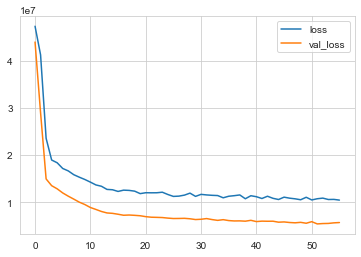

In [38]:
metrics = pd.DataFrame(model.history.history)
metrics.plot()

In [39]:
predictions = model.predict(X_test_scaled)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [41]:
#MAE
mean_absolute_error(y_test, predictions)

1438.5391302898659

In [42]:
#MSE
mean_squared_error(y_test, predictions)

5693179.231292178

In [43]:
#RMSE
np.sqrt(mean_squared_error(y_test, predictions))

2386.0383968604065

In [44]:
explained_variance_score(y_test, predictions)
#best score is 1.0

0.7201565193037797

Text(0, 0.5, 'predictions')

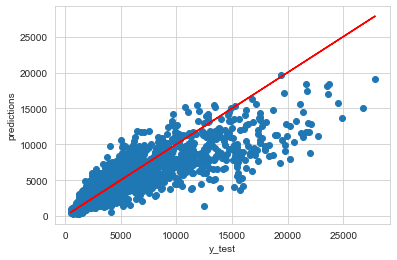

In [45]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, "r")
plt.xlabel("y_test")
plt.ylabel("predictions")

In [46]:
df["total"].mean()

5198.132615816566

### Linear Model without the rent amount #2/3

In [47]:
X1 = df.drop(["rent amount", "total"], axis=1).values
#y can remain the same

In [48]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)

In [49]:
scaler1 = MinMaxScaler()

In [50]:
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm1 = LinearRegression()

In [60]:
lm1.fit(X1_train_scaled, y_train)

LinearRegression()

In [61]:
coef1 = pd.DataFrame(lm1.coef_, df.drop(["rent amount", "total"], axis=1).columns,
                    columns=["Coef1"])

In [62]:
coef1
#new coefficients without rent amount

,Coef1
area,-2512.400521
rooms,-282.730533
bathroom,202.237053
parking spaces,-221.647001
floor,4134.597349
animal,-4.763182
furniture,73.506461
hoa,39583.830525
property tax,28887.724000
fire insurance,26669.577886


In [63]:
lm1_pred = lm1.predict(X1_test_scaled)

In [64]:
mean_absolute_error(y_test, lm1_pred)

260.0237031003655

In [65]:
np.sqrt(mean_squared_error(y_test, lm1_pred))

1533.928279412678

In [66]:
explained_variance_score(y_test, lm1_pred)

0.8819492232789055

Text(0, 0.5, 'lm1_pred')

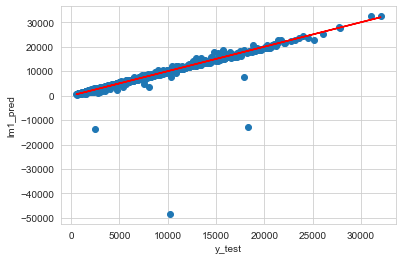

In [67]:
plt.scatter(y_test, lm1_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("y_test")
plt.ylabel("lm1_pred")
#better fit than the base model, but included fire insurance

In [68]:
#metrics show that even without the significant indicator of rent amount,
#the prediction can remain quite accurate

### Linear Model without the rent amount or fire insurance #3/3

In [69]:
X2 = df.drop(["total", "rent amount", "fire insurance"], axis=1).values

In [70]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

In [71]:
scaler2 = MinMaxScaler()

In [72]:
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [73]:
lm2 = LinearRegression()

In [74]:
lm2.fit(X2_train_scaled, y_train)

LinearRegression()

In [75]:
coef2 = pd.DataFrame(lm2.coef_, df.drop(["total", "rent amount", "fire insurance"], axis=1).columns,
                    columns=["Coef2"])

coef2
#new coefficients without rent amount or fire insurance

,Coef2
area,5661.149204
rooms,4081.284501
bathroom,7064.683160
parking spaces,4645.482864
floor,2754.380323
animal,-122.461880
furniture,1079.797354
hoa,43162.334046
property tax,48374.307010
Campinas,-435.714071


In [76]:
lm2_pred = lm2.predict(X2_test_scaled)

In [77]:
mean_absolute_error(y_test, lm2_pred)

1491.6481311684327

In [78]:
np.sqrt(mean_squared_error(y_test, lm2_pred))

2287.2464372024338

In [79]:
explained_variance_score(y_test, lm2_pred)

0.7317251606552979

Text(0, 0.5, 'lm2_pred')

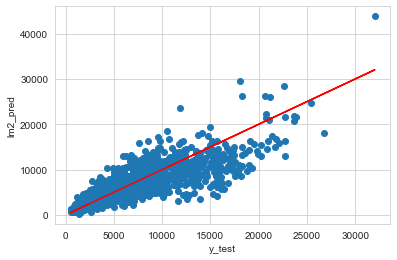

In [81]:
plt.scatter(y_test, lm2_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("y_test")
plt.ylabel("lm2_pred")

# 0-10000 total rent model #4/4

In [93]:
sub_df = df[df["total"] <= 7000]

In [94]:
len(sub_df)

8125

In [96]:
df[df["total"] > 7000].mean()

area                310.443359
rooms                 3.514844
bathroom              3.791797
parking spaces        3.059766
floor                 6.097266
animal                0.817969
furniture             0.337500
hoa                1993.561328
rent amount        8810.811328
property tax        948.687891
fire insurance      120.282031
total             11873.628125
Campinas              0.030859
Porto Alegre          0.028906
Rio de Janeiro        0.098437
São Paulo             0.741797
dtype: float64

In [97]:
X3 = sub_df.drop(["total", "rent amount", "fire insurance"], axis=1).values
y3 = sub_df["total"].values

In [98]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

In [99]:
scaler3 = MinMaxScaler()

In [100]:
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

In [101]:
lm3 = LinearRegression()

In [102]:
lm3.fit(X3_train_scaled, y3_train)

LinearRegression()

In [103]:
coef3 = pd.DataFrame(lm3.coef_, sub_df.drop(["total", "rent amount", "fire insurance"], axis=1).columns,
                    columns=["Coef3"])

coef3
#new coefficients without rent amount or fire insurance

,Coef3
area,4266.548457
rooms,1940.549104
bathroom,2197.058240
parking spaces,1936.222102
floor,3550.217247
animal,13.863147
furniture,721.820402
hoa,3823.019880
property tax,4456.126210
Campinas,-163.247603


In [104]:
lm3_pred = lm3.predict(X3_test_scaled)

In [105]:
mean_absolute_error(y3_test, lm3_pred)

683.4668528707546

In [106]:
np.sqrt(mean_squared_error(y3_test, lm3_pred))

908.8992896876048

In [107]:
explained_variance_score(y3_test, lm3_pred)

0.669501037215033

Text(0, 0.5, 'lm3_pred')

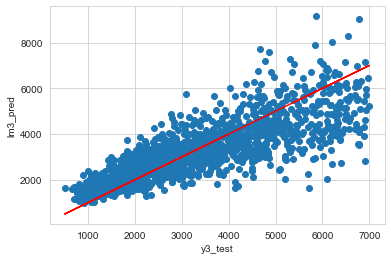

In [108]:
plt.scatter(y3_test, lm3_pred)
plt.plot(y3_test, y3_test, "r")
plt.xlabel("y3_test")
plt.ylabel("lm3_pred")

In [109]:
sub_df["total"].mean()

3094.838030769231